# Unconstrained Optimization Algorithms: 
## Gradient Descent & Line Searching

In [1]:
# Importing packages
import matplotlib.pyplot as plt
from numpy import linalg as lp
import numpy as np
import math

%matplotlib inline

Exmaple function from section 4.2 of Freund, R.M. (2004).

$$f\left(x\right)=\frac{1}{2}x^TQx-c^Tx+10$$


$$f\left(x\right)=\frac{1}{2}\times\left(\begin{matrix}x_1\\x_2\end{matrix}\right)^T\times\left(\begin{matrix}20&5\\5&2\end{matrix}\right)\times\left(\begin{matrix}x_1\\x_2\end{matrix}\right)-\left(\begin{matrix}14\\6\end{matrix}\right)^T\times\left(\begin{matrix}x_1\\x_2\end{matrix}\right)-10$$

$$f\left(x\right)=2\left(5+10x_1^2-3x_2+x_2^2+x_1\left(-7+5x_2\right)\right)$$

In [2]:
def function(x):                     
    return 2*(5+10*x[0]**2-3*x[1]+x[1]**2+x[0]*(-7+5*x[1]))

In [3]:
def gradient(x):                    
    value = np.full(len(x), 0)    
    xd = x.copy()
    h = 10**-6
    for j in range(len(x)):
        xd[j] = x[j] + h
        value[j] = (function(xd) - function(x))/h
        xd = x.copy()
    return value

In [29]:
def step_size(x):                 
    alpha = 1                    
    beta = 0.8
    while function(x-alpha*gradient(x)) > \
    (function(x)-.5*alpha*lp.norm(gradient(x))**2):
        alpha *= beta
    return alpha

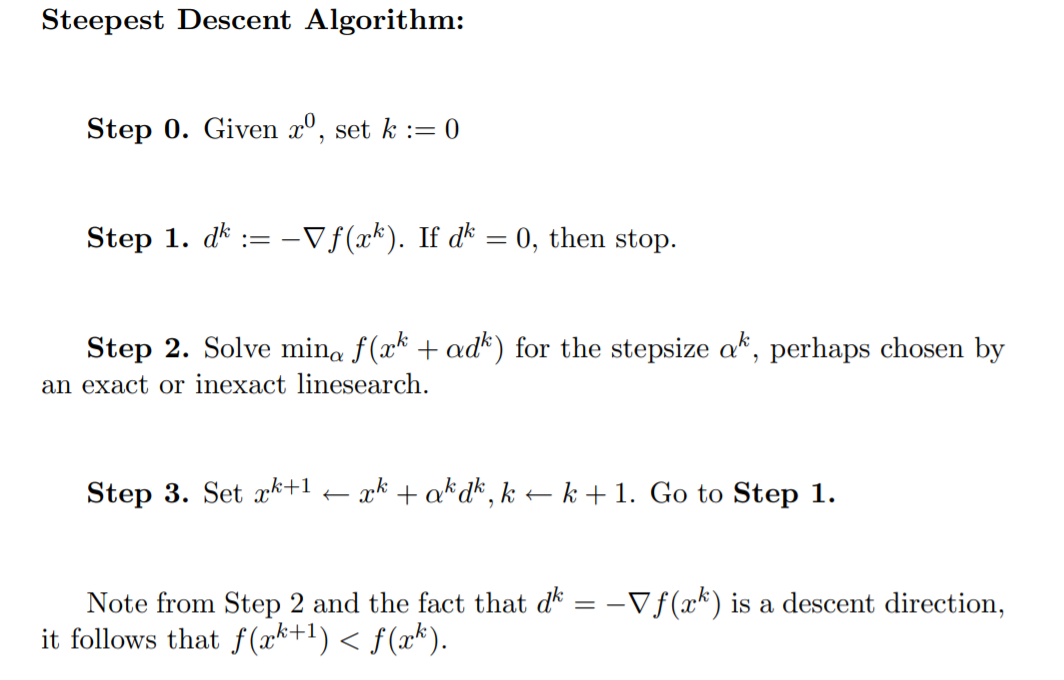

In [27]:
"""
I would put the starting point at [0, 0] 
but had to follow the example from Freund, R.M. (2004).
"""
x = [40, -100]
x1 = np.array([])
x2 = np.array([])

pre, k = 0, 0

# Gradient-Descent Algorithm
while abs(function(x) - pre) > 0:
    pre = function(x)
    x1 = np.append(x1, x[0])
    x2 = np.append(x2, x[1])
    
    alpha = step_size(x)
    x -= alpha*gradient(x)
    k += 1
    
print("Function Value: ", function(x), "\nAt x = ", x, "in", k, "iterations")

Function Value:  5.801090572384302 
At x =  [0.10564042 0.99951905] in 20 iterations


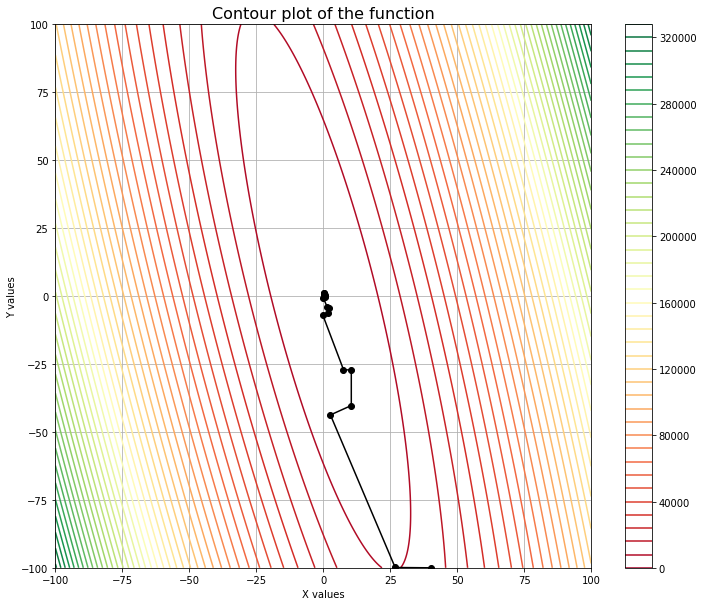

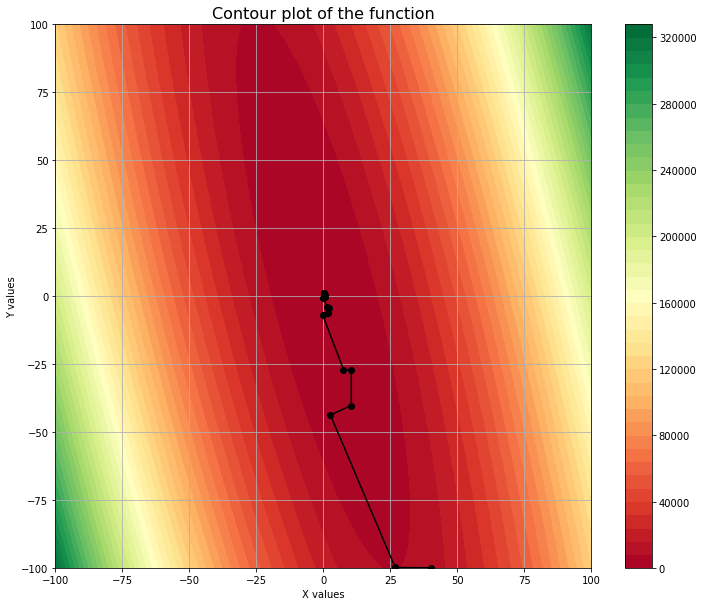

In [28]:
"""
Contour plot of a function
Ref: https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
"""
x = np.arange(-100, 100, 0.05)
y = np.arange(-100, 100, 0.05)

X, Y = np.meshgrid(x, y)
Z = 2*(5+10*X**2-3*Y+Y**2+X*(-7+5*Y))

for _ in [plt.contour, plt.contourf]:
    plt.figure(figsize=(12, 10))
    _(X, Y, Z, 50,cmap='RdYlGn')
    plt.plot(x1, x2, 'o-', color='black')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Contour plot of the function', fontsize=16)
    plt.colorbar()
    plt.grid(True)
    plt.show()

## Checking the results with Mathematica
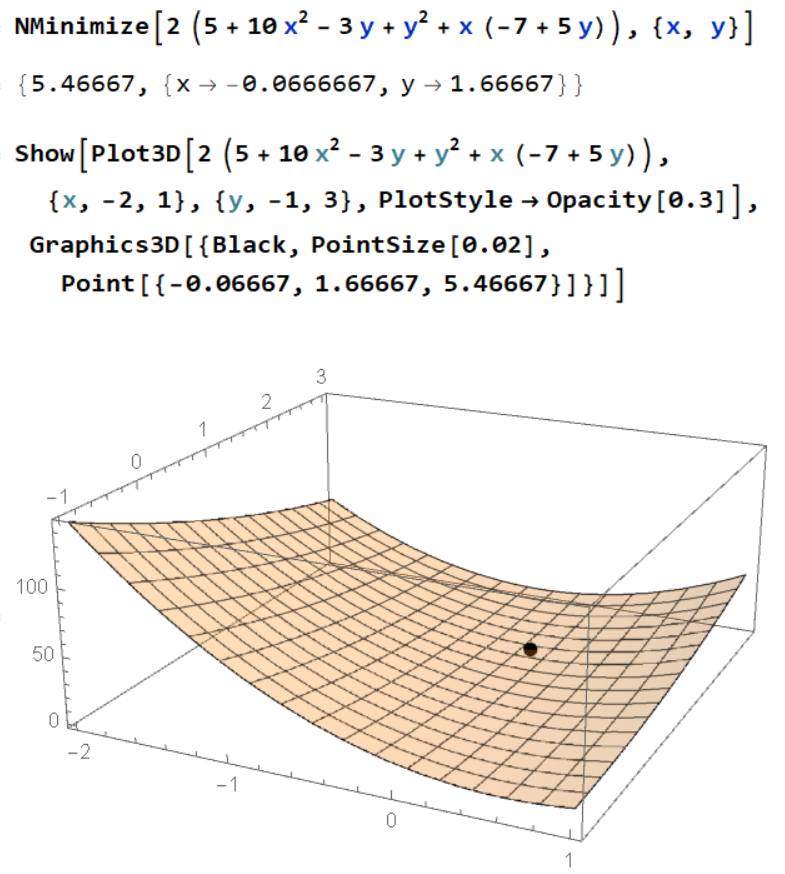